In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline

In [2]:
data = pd.read_csv('Spectrum_ground_truth_v1')

In [3]:
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)

In [4]:
data = data.loc[data['350'].notnull(), :]

In [6]:
trait = 'CHL'

In [7]:
df = data.loc[data[trait].notnull(), :]

In [10]:
df.columns[0:20]

Index(['PLOT ID', 'Fresh_weight', 'Leaf_area', 'LWC', 'SLA', 'CHL', 'CHL1',
       'CHL2', 'CHL3', 'Dry_weight', 'rows', 'ranges', 'Block', 'Rep', 'Trt',
       'year', 'genotype', 'note', 'Calibration', 'ASD'],
      dtype='object')

In [167]:
data

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1001,NaN,NaN,NaN,NaN,287.350948,NaN,NaN,NaN,NaN,...,0.035234,0.035088,0.034933,0.034826,0.034614,0.034352,0.034138,0.033865,0.033638,0.033476
1,1002,NaN,NaN,NaN,NaN,390.254776,NaN,NaN,NaN,NaN,...,0.037554,0.037249,0.037154,0.037163,0.037074,0.037141,0.037005,0.036618,0.036303,0.035844
2,1003,NaN,NaN,NaN,NaN,285.125419,NaN,NaN,NaN,NaN,...,0.042723,0.042242,0.042083,0.041943,0.041776,0.041955,0.041835,0.041389,0.041090,0.040662
3,1004,NaN,NaN,NaN,NaN,405.279513,NaN,NaN,NaN,NaN,...,0.041980,0.041998,0.041733,0.041467,0.041499,0.041415,0.041049,0.041078,0.041080,0.040855
4,1005,7.73,366.0,77.490298,210.344828,376.877058,NaN,NaN,NaN,1.74,...,0.035746,0.035719,0.035662,0.035373,0.035116,0.034928,0.034894,0.035089,0.035207,0.035318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,4596,NaN,NaN,NaN,NaN,512.557188,NaN,NaN,NaN,NaN,...,0.059570,0.059487,0.059379,0.059312,0.059066,0.058804,0.058750,0.058499,0.058298,0.058202
2396,4597,16.62,660.4,73.285199,148.738739,536.600000,458.9,552.0,598.9,4.44,...,0.045764,0.045825,0.045893,0.045686,0.045541,0.045311,0.045272,0.045472,0.045199,0.045085
2397,4598,NaN,NaN,NaN,NaN,544.687494,NaN,NaN,NaN,NaN,...,0.056652,0.056354,0.056035,0.055800,0.055557,0.055148,0.054880,0.054803,0.054617,0.054308
2398,4599,NaN,NaN,NaN,NaN,496.484387,NaN,NaN,NaN,NaN,...,0.050402,0.050328,0.050200,0.049665,0.049339,0.049328,0.049174,0.048901,0.048625,0.048320


In [169]:
data

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1001,NaN,NaN,NaN,NaN,287.350948,NaN,NaN,NaN,NaN,...,0.035234,0.035088,0.034933,0.034826,0.034614,0.034352,0.034138,0.033865,0.033638,0.033476
1,1002,NaN,NaN,NaN,NaN,390.254776,NaN,NaN,NaN,NaN,...,0.037554,0.037249,0.037154,0.037163,0.037074,0.037141,0.037005,0.036618,0.036303,0.035844
2,1003,NaN,NaN,NaN,NaN,285.125419,NaN,NaN,NaN,NaN,...,0.042723,0.042242,0.042083,0.041943,0.041776,0.041955,0.041835,0.041389,0.041090,0.040662
3,1004,NaN,NaN,NaN,NaN,405.279513,NaN,NaN,NaN,NaN,...,0.041980,0.041998,0.041733,0.041467,0.041499,0.041415,0.041049,0.041078,0.041080,0.040855
4,1005,7.73,366.0,77.490298,210.344828,376.877058,NaN,NaN,NaN,1.74,...,0.035746,0.035719,0.035662,0.035373,0.035116,0.034928,0.034894,0.035089,0.035207,0.035318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,4596,NaN,NaN,NaN,NaN,512.557188,NaN,NaN,NaN,NaN,...,0.059570,0.059487,0.059379,0.059312,0.059066,0.058804,0.058750,0.058499,0.058298,0.058202
2396,4597,16.62,660.4,73.285199,148.738739,536.600000,458.9,552.0,598.9,4.44,...,0.045764,0.045825,0.045893,0.045686,0.045541,0.045311,0.045272,0.045472,0.045199,0.045085
2397,4598,NaN,NaN,NaN,NaN,544.687494,NaN,NaN,NaN,NaN,...,0.056652,0.056354,0.056035,0.055800,0.055557,0.055148,0.054880,0.054803,0.054617,0.054308
2398,4599,NaN,NaN,NaN,NaN,496.484387,NaN,NaN,NaN,NaN,...,0.050402,0.050328,0.050200,0.049665,0.049339,0.049328,0.049174,0.048901,0.048625,0.048320


In [8]:
#Identify x 
position_350 = df.columns.get_loc('350')
position_2500 = df.columns.get_loc('2500') + 1 
X = df.iloc[:, position_350 : position_2500]

In [9]:
#Extracting the column names
col_names=X.columns

In [10]:
#applying savitzky golay
X = savgol_filter(X, window_length=5 , polyorder = 2)
X = pd.DataFrame(X, columns=col_names)

In [11]:
#drop first 100 column
X = X.drop(X.columns[0:100], axis=1)

In [12]:
#Create a np array for downsampling for every 5 nm
column_filter = np.arange(0, 2055, 5)

In [13]:
# Choose from the X based on filtering array
X = X.iloc[: , column_filter]

In [14]:
# PLOT ID column was added again for merging 
X.insert(0, 'PLOT ID', np.array(df['PLOT ID']))

In [15]:
first_columns = df[['PLOT ID', 'Fresh_weight', 'Leaf_area', 'LWC', 'SLA', 'CHL', 'CHL1',
       'CHL2', 'CHL3', 'Dry_weight', 'rows', 'ranges', 'Block', 'Rep', 'Trt',
       'year', 'genotype', 'note', 'Calibration', 'ASD']]



In [16]:
#merging GEM gt
df=pd.merge(first_columns, X, how='outer')

In [17]:
df

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,2077,11.30,544.30,74.867257,191.654930,270.533333,231.1,245.6,334.9,2.84,...,0.072729,0.070272,0.067877,0.065537,0.063610,0.062151,0.060620,0.058918,0.058016,0.056736
1,2082,12.20,519.60,72.868852,156.978852,429.566667,356.4,407.1,525.2,3.31,...,0.070413,0.068027,0.065486,0.063828,0.061803,0.060045,0.058654,0.057294,0.056347,0.054973
2,2089,9.60,452.90,73.333333,176.914062,313.833333,236.4,323.5,381.6,2.56,...,0.073305,0.070533,0.068286,0.066110,0.063953,0.062229,0.060127,0.059295,0.058106,0.057159
3,2090,8.20,358.60,74.634146,172.403846,349.300000,283.4,416.5,348.0,2.08,...,0.053787,0.051937,0.050193,0.048651,0.047140,0.045860,0.044532,0.043931,0.043024,0.042396
4,2096,8.50,436.70,76.823529,221.675127,255.333333,174.0,287.8,304.2,1.97,...,0.068605,0.065904,0.063274,0.061591,0.059520,0.057616,0.056196,0.054746,0.053379,0.053163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,4587,14.96,628.00,72.526738,152.798054,552.066667,493.6,585.4,577.2,4.11,...,0.057304,0.055618,0.054255,0.052254,0.051160,0.050028,0.048961,0.048075,0.047927,0.046863
213,4589,11.62,525.80,74.268503,175.852843,457.700000,377.0,478.6,517.5,2.99,...,0.053143,0.051391,0.050009,0.048248,0.047225,0.045835,0.045225,0.044159,0.043247,0.043314
214,4590,12.32,503.80,72.077922,146.453488,483.700000,382.4,508.5,560.2,3.44,...,0.065332,0.063273,0.061116,0.059545,0.057473,0.055754,0.054691,0.053247,0.052504,0.051653
215,4591,11.17,505.87,72.873769,166.953795,521.533333,465.5,541.6,557.5,3.03,...,0.065816,0.063957,0.062021,0.060217,0.058768,0.057140,0.056466,0.055024,0.054189,0.053637


In [18]:
brooke = pd.read_csv('Brooke_gt_merged')

In [19]:
brooke.rename(columns={'Dry weight': 'Dry_weight'},inplace=True)

In [20]:
data_all_v1 = pd.concat([df, brooke])

In [21]:
data_all_v1.reset_index(inplace=True, drop=True)

In [22]:
## Adding 18-20 data
M1820 = pd.read_csv('Maize18-20.csv' , dtype= {'Year' : 'category' , 'Genotpye' : 'object' , 'Conditions' : 'category' , 'crop' : 'category',
                                              'pheno' : 'category' , 'StalkLodgingPct' : 'object'})

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2166,2182,2188,2189) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
M1820.rename(columns = {'PlotID' : 'PLOT ID', 'Chlorophyll' : 'CHL', 'Leaf_Dry_Weight' : 'Dry_weight', 
                       'Leaf_Fresh_Weight': 'Fresh_weight', 'Leaf_Area' : 'Leaf_area', 'Specific_Leaf_Area': 'SLA'
                       },inplace=True)

In [24]:
LWC = M1820['Leaf_Water_Content'] *100

In [25]:
M1820.insert(3, 'LWC', LWC)

# DIGER TARAFTA CALISAN KOD#

In [26]:
M1820_trait = M1820.loc[M1820[trait].notnull(), :]

In [27]:
y= M1820_trait.loc[M1820_trait['Year'] != '2020', trait]

In [28]:
y

0       476.60
1       492.17
2       428.91
3       554.80
4       425.94
         ...  
1205    441.60
1206    460.70
1207    425.40
1208    452.40
1209    403.80
Name: CHL, Length: 1210, dtype: float64

In [29]:
# selecting the hyperspectral Data
X_total = M1820_trait.loc[M1820_trait.Year != '2020']
X_total =  X_total.iloc[: ,11:2162]


In [30]:
#remove the first 100
X_total.drop(columns = X_total.columns[0:100], inplace = True) 

In [31]:
sav_X = savgol_filter(X_total, window_length=5 , polyorder = 2)
sav_X.shape
df = pd.DataFrame(sav_X)
df.shape

(1210, 2051)

In [32]:
#Identify x 
position_350 = M1820.columns.get_loc('350')
position_2500 = M1820.columns.get_loc('2500') + 1 
X = M1820.iloc[:, position_350 : position_2500]

In [33]:
## Downsampling every 5 nm
column_filter = np.arange(0,2050,5)  ## creating an index for column filtering
X= df.iloc[:, column_filter] # selecting the filtered columns 

In [34]:
X

,0,5,10,15,20,25,30,35,40,45,...,2000,2005,2010,2015,2020,2025,2030,2035,2040,2045
0,0.055697,0.056308,0.056915,0.056282,0.056266,0.056073,0.056486,0.056540,0.056949,0.057578,...,0.057044,0.055040,0.053502,0.051976,0.049967,0.048784,0.047596,0.046577,0.045197,0.044646
1,0.047062,0.047666,0.047747,0.047487,0.047766,0.046779,0.046745,0.046928,0.047551,0.047418,...,0.047882,0.046358,0.044865,0.043462,0.042257,0.041001,0.039954,0.038982,0.038187,0.037446
2,0.062530,0.063193,0.062680,0.062740,0.062249,0.062587,0.062033,0.062406,0.062671,0.062889,...,0.056217,0.054824,0.053451,0.051938,0.050669,0.049414,0.048448,0.047853,0.046589,0.046291
3,0.063028,0.063757,0.063248,0.063293,0.062883,0.062799,0.062553,0.062622,0.062960,0.063268,...,0.064278,0.062191,0.060239,0.058462,0.056742,0.055065,0.053999,0.052615,0.051718,0.051120
4,0.054530,0.054946,0.055045,0.055068,0.054493,0.054601,0.054903,0.054883,0.055037,0.056045,...,0.053655,0.051827,0.050021,0.048608,0.047107,0.045579,0.044420,0.043319,0.042522,0.041772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0.057272,0.058190,0.057879,0.058228,0.057853,0.058498,0.058227,0.058802,0.059593,0.060809,...,0.064457,0.062125,0.060015,0.058034,0.056200,0.054787,0.053162,0.051628,0.050305,0.049649
1206,0.057040,0.057745,0.058330,0.058418,0.057895,0.058482,0.058230,0.058855,0.059583,0.061044,...,0.055797,0.053935,0.052303,0.050909,0.049426,0.048202,0.047013,0.045861,0.045102,0.044514
1207,0.053451,0.054180,0.054320,0.055093,0.054959,0.054680,0.054053,0.054917,0.055920,0.058343,...,0.054466,0.052688,0.050861,0.049238,0.047786,0.046560,0.045238,0.044029,0.043427,0.042548
1208,0.058446,0.060851,0.061359,0.060725,0.061255,0.060597,0.061148,0.061762,0.063008,0.065798,...,0.067403,0.065095,0.062842,0.060818,0.058809,0.057163,0.055674,0.054243,0.053074,0.052027


In [35]:
# split the dataset into training (60%) and testing (40%) sets
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.4) 

In [36]:
### calculate RMSE
pls = PLSRegression(n_components=20)
pls.fit(X_train, y_train)

PLSRegression(n_components=20)

In [37]:
np.sqrt(mean_squared_error(y_test, pls.predict(X_test)))

27.36290911066292

In [38]:
y_pred = pls.predict(X_test)

<AxesSubplot:xlabel='CHL', ylabel='Predicted LWC values'>

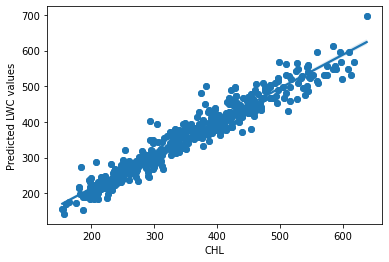

In [39]:
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted LWC values')
plt.xlabel('Ground truth LWC measurements')
sns.regplot(x = y_test , y = y_pred)

In [40]:
from scipy.stats import pearsonr, spearmanr
y_pred2 = [x[0] for x in y_pred]

r, p = spearmanr(y_test, y_pred2)
r2 = r**2
print(r2, p)

0.9387968176243622 1.535967886090242e-294


# diger tarafta calisan kod #

In [41]:
M1820_trait = M1820.loc[M1820[trait].notnull(), :]
M1820_trait = M1820_trait.loc[M1820_trait['Year'] != '2020', :]

In [42]:
#Identify x 
position_350 = M1820_trait.columns.get_loc('350')
position_2500 = M1820_trait.columns.get_loc('2500') + 1 
X = M1820_trait.iloc[:, position_350 : position_2500]


In [43]:
X

,350,351,352,353,354,355,356,357,358,359,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.106430,0.098860,0.088910,0.077947,0.072843,0.093862,0.090015,0.070006,0.090431,0.084056,...,0.045184,0.045096,0.045050,0.044625,0.044355,0.044527,0.044399,0.043810,0.043605,0.043599
1,0.097093,0.103140,0.083749,0.066028,0.072148,0.087739,0.098567,0.092104,0.062686,0.095519,...,0.038003,0.037762,0.037672,0.037440,0.037419,0.037894,0.037886,0.037521,0.037509,0.037503
2,0.125163,0.124518,0.127662,0.127982,0.127173,0.115487,0.111536,0.112970,0.100015,0.079823,...,0.046410,0.046467,0.046406,0.046281,0.046181,0.046085,0.045880,0.045441,0.045417,0.045704
3,0.101250,0.094361,0.086309,0.090478,0.107267,0.088325,0.076786,0.083318,0.080874,0.084091,...,0.051306,0.051264,0.051125,0.051135,0.050983,0.050531,0.050280,0.050144,0.049989,0.049945
4,0.096988,0.106913,0.099666,0.085338,0.086283,0.086462,0.085748,0.084381,0.081730,0.073750,...,0.041867,0.042194,0.042013,0.041689,0.041549,0.040944,0.040854,0.041708,0.041670,0.041102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0.018462,0.083275,0.100908,0.083378,0.110900,0.103183,0.094069,0.097444,0.099497,0.063413,...,0.049948,0.050165,0.050022,0.049576,0.049323,0.048908,0.048707,0.048788,0.048810,0.048986
1206,0.071978,0.093741,0.100782,0.093073,0.097581,0.097194,0.095029,0.092184,0.086068,0.069680,...,0.044395,0.044416,0.044305,0.044557,0.044560,0.044199,0.043961,0.043740,0.043638,0.043543
1207,0.129601,0.091998,0.087160,0.107831,0.105226,0.083397,0.081368,0.089573,0.062108,0.081436,...,0.042617,0.042558,0.042421,0.042585,0.042525,0.042152,0.041987,0.042005,0.041780,0.041325
1208,0.097422,0.024980,0.045219,0.109365,0.110137,0.075801,0.057043,0.070797,0.095715,0.079927,...,0.052669,0.052493,0.052295,0.052027,0.051711,0.051372,0.051050,0.050479,0.050353,0.050778


In [44]:
#drop first 100 column
X.drop(columns = X.columns[0:100], inplace=True)


In [45]:
#Extracting the column names
col_names=X.columns

In [46]:
#applying savitzky golay
X = savgol_filter(X, window_length=5 , polyorder = 2)
X = pd.DataFrame(X, columns=col_names)

In [47]:
#Create a np array for downsampling for every 5 nm
column_filter = np.arange(0, 2055, 5)

In [48]:
# Choose from the X based on filtering array
X = X.iloc[: , column_filter]

In [49]:
# PLOT ID column was added again for merging 
X.insert(0, 'PLOT ID', np.array(M1820_trait['PLOT ID']))

In [50]:
X

,PLOT ID,450,455,460,465,470,475,480,485,490,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,1,0.055993,0.056322,0.056879,0.056425,0.056397,0.056072,0.056376,0.056658,0.056853,...,0.054728,0.053201,0.051591,0.049702,0.048369,0.047261,0.046477,0.045248,0.044443,0.043548
1,2,0.047382,0.048127,0.047687,0.047716,0.047202,0.047071,0.046897,0.047100,0.046982,...,0.045991,0.044575,0.043089,0.042055,0.040771,0.039858,0.038821,0.038129,0.037527,0.037481
2,3,0.062398,0.063536,0.062903,0.062879,0.062222,0.062713,0.061678,0.062325,0.062564,...,0.054485,0.053088,0.051560,0.050420,0.049137,0.048187,0.047528,0.046476,0.046189,0.045660
3,4,0.063457,0.063583,0.063550,0.063454,0.063019,0.062917,0.062665,0.062473,0.062985,...,0.061799,0.059871,0.058151,0.056560,0.054797,0.053684,0.052543,0.051463,0.050928,0.049942
4,5,0.054616,0.055025,0.055203,0.055006,0.054636,0.054771,0.054737,0.054916,0.055343,...,0.051536,0.049742,0.048303,0.046935,0.045392,0.044128,0.043162,0.042092,0.041409,0.041218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,0.057219,0.058138,0.058779,0.057837,0.057801,0.058838,0.058261,0.058749,0.059975,...,0.061812,0.059660,0.057641,0.055774,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991
1206,1268,0.057198,0.057884,0.058567,0.058332,0.058081,0.058744,0.058257,0.058976,0.060111,...,0.053659,0.051965,0.050625,0.049163,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547
1207,1269,0.054172,0.054569,0.054368,0.055197,0.055280,0.055210,0.054157,0.055296,0.056307,...,0.052351,0.050417,0.048966,0.047404,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360
1208,1270,0.058192,0.060730,0.061176,0.060620,0.060924,0.060902,0.061088,0.062168,0.063329,...,0.064711,0.062493,0.060515,0.058571,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706


In [51]:
trait_column = M1820_trait[['PLOT ID', trait]]

In [52]:
#merging M1820 again
M1820=pd.merge(trait_column, X, how='outer')

In [53]:
M1820

,PLOT ID,CHL,450,455,460,465,470,475,480,485,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,1,476.60,0.055993,0.056322,0.056879,0.056425,0.056397,0.056072,0.056376,0.056658,...,0.054728,0.053201,0.051591,0.049702,0.048369,0.047261,0.046477,0.045248,0.044443,0.043548
1,2,492.17,0.047382,0.048127,0.047687,0.047716,0.047202,0.047071,0.046897,0.047100,...,0.045991,0.044575,0.043089,0.042055,0.040771,0.039858,0.038821,0.038129,0.037527,0.037481
2,3,428.91,0.062398,0.063536,0.062903,0.062879,0.062222,0.062713,0.061678,0.062325,...,0.054485,0.053088,0.051560,0.050420,0.049137,0.048187,0.047528,0.046476,0.046189,0.045660
3,4,554.80,0.063457,0.063583,0.063550,0.063454,0.063019,0.062917,0.062665,0.062473,...,0.061799,0.059871,0.058151,0.056560,0.054797,0.053684,0.052543,0.051463,0.050928,0.049942
4,5,425.94,0.054616,0.055025,0.055203,0.055006,0.054636,0.054771,0.054737,0.054916,...,0.051536,0.049742,0.048303,0.046935,0.045392,0.044128,0.043162,0.042092,0.041409,0.041218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,441.60,0.057219,0.058138,0.058779,0.057837,0.057801,0.058838,0.058261,0.058749,...,0.061812,0.059660,0.057641,0.055774,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991
1206,1268,460.70,0.057198,0.057884,0.058567,0.058332,0.058081,0.058744,0.058257,0.058976,...,0.053659,0.051965,0.050625,0.049163,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547
1207,1269,425.40,0.054172,0.054569,0.054368,0.055197,0.055280,0.055210,0.054157,0.055296,...,0.052351,0.050417,0.048966,0.047404,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360
1208,1270,452.40,0.058192,0.060730,0.061176,0.060620,0.060924,0.060902,0.061088,0.062168,...,0.064711,0.062493,0.060515,0.058571,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706


In [54]:
data_all_v2 = pd.concat([data_all_v1, M1820])

In [55]:
data_all_v2

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2475,2480,2485,2490,2495,2500,Unnamed: 0,Growth_Stage,Genotype,Location
0,2077,11.3,544.3,74.867257,191.654930,270.533333,231.1,245.6,334.9,2.84,...,0.063610,0.062151,0.060620,0.058918,0.058016,0.056736,NaN,NaN,NaN,NaN
1,2082,12.2,519.6,72.868852,156.978852,429.566667,356.4,407.1,525.2,3.31,...,0.061803,0.060045,0.058654,0.057294,0.056347,0.054973,NaN,NaN,NaN,NaN
2,2089,9.6,452.9,73.333333,176.914062,313.833333,236.4,323.5,381.6,2.56,...,0.063953,0.062229,0.060127,0.059295,0.058106,0.057159,NaN,NaN,NaN,NaN
3,2090,8.2,358.6,74.634146,172.403846,349.300000,283.4,416.5,348.0,2.08,...,0.047140,0.045860,0.044532,0.043931,0.043024,0.042396,NaN,NaN,NaN,NaN
4,2096,8.5,436.7,76.823529,221.675127,255.333333,174.0,287.8,304.2,1.97,...,0.059520,0.057616,0.056196,0.054746,0.053379,0.053163,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,NaN,NaN,NaN,NaN,441.600000,NaN,NaN,NaN,NaN,...,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991,NaN,NaN,NaN,NaN
1206,1268,NaN,NaN,NaN,NaN,460.700000,NaN,NaN,NaN,NaN,...,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547,NaN,NaN,NaN,NaN
1207,1269,NaN,NaN,NaN,NaN,425.400000,NaN,NaN,NaN,NaN,...,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360,NaN,NaN,NaN,NaN
1208,1270,NaN,NaN,NaN,NaN,452.400000,NaN,NaN,NaN,NaN,...,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706,NaN,NaN,NaN,NaN


In [56]:
#chhosing the data (SAM, HIPS, 1820 and BGEM combination or only BGEM)
data_all = data_all_v1

In [57]:
data_all = data_all.loc[data_all[trait].notnull(), :]

In [58]:
data_all

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2475,2480,2485,2490,2495,2500,Unnamed: 0,Growth_Stage,Genotype,Location
0,2077,11.30,544.3,74.867257,191.654930,270.533333,231.1,245.6,334.9,2.84,...,0.063610,0.062151,0.060620,0.058918,0.058016,0.056736,NaN,NaN,NaN,NaN
1,2082,12.20,519.6,72.868852,156.978852,429.566667,356.4,407.1,525.2,3.31,...,0.061803,0.060045,0.058654,0.057294,0.056347,0.054973,NaN,NaN,NaN,NaN
2,2089,9.60,452.9,73.333333,176.914062,313.833333,236.4,323.5,381.6,2.56,...,0.063953,0.062229,0.060127,0.059295,0.058106,0.057159,NaN,NaN,NaN,NaN
3,2090,8.20,358.6,74.634146,172.403846,349.300000,283.4,416.5,348.0,2.08,...,0.047140,0.045860,0.044532,0.043931,0.043024,0.042396,NaN,NaN,NaN,NaN
4,2096,8.50,436.7,76.823529,221.675127,255.333333,174.0,287.8,304.2,1.97,...,0.059520,0.057616,0.056196,0.054746,0.053379,0.053163,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,6116,10.33,544.5,72.507260,191.725352,392.000000,325.4,438.5,412.1,2.84,...,0.084279,0.082632,0.081726,0.080514,0.078979,0.078064,271.0,2.0,WF9 x H95,HIPS
489,1157,7.73,365.7,73.738680,180.147783,321.600000,355.5,322.6,286.7,2.03,...,0.066089,0.065366,0.063772,0.063121,0.062455,0.061334,272.0,2.0,LH123HT@,SAM
498,6255,4.39,248.8,NaN,NaN,114.566667,87.6,135.7,120.4,NaN,...,0.134043,0.131491,0.129041,0.126676,0.124981,0.123236,281.0,2.0,LH123HT x 3IIH6,HIPS
499,6261,5.67,325.6,NaN,NaN,444.900000,304.2,525.9,504.6,NaN,...,0.101411,0.099513,0.097904,0.095859,0.094690,0.093403,282.0,2.0,B14A x Mo17,HIPS


In [59]:
#defining a function to remove the outliers
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1=datacolumn.quantile(0.25)
 Q3=datacolumn.quantile(0.75)
 #Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.50 * IQR)
 upper_range = Q3 + (1.50 * IQR)
 return lower_range,upper_range

In [60]:
outlier_treatment(data_all[trait])

(131.2666666666668, 579.6666666666666)

In [61]:
lowerbound,upperbound = outlier_treatment(data_all[trait])

In [62]:
rm_index =data_all[(data_all[trait] < lowerbound) | (data_all[trait] > upperbound)].index
rm_index.size

5

In [63]:
data_all.drop(rm_index, axis=0 ,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
#df= data_all.loc[data_all[trait].notnull(),:]
y = data_all.loc[:, trait]

In [65]:
y

0      270.533333
1      429.566667
2      313.833333
3      349.300000
4      255.333333
          ...    
487    356.666667
488    392.000000
489    321.600000
499    444.900000
500    303.233333
Name: CHL, Length: 485, dtype: float64

In [66]:
#Scale the y
#y= scale(y)

In [67]:
position_450 = data_all.columns.get_loc('450')
position_2500 = data_all.columns.get_loc('2500') + 1 
X = data_all.iloc[:, position_450 : position_2500]

In [68]:
X

,450,455,460,465,470,475,480,485,490,495,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,0.053303,0.055719,0.057250,0.058304,0.058684,0.058781,0.059279,0.060433,0.063244,0.067410,...,0.072729,0.070272,0.067877,0.065537,0.063610,0.062151,0.060620,0.058918,0.058016,0.056736
1,0.046280,0.047698,0.048300,0.048775,0.049296,0.049253,0.049405,0.050353,0.051982,0.054699,...,0.070413,0.068027,0.065486,0.063828,0.061803,0.060045,0.058654,0.057294,0.056347,0.054973
2,0.051248,0.053267,0.054210,0.054480,0.054979,0.054863,0.055218,0.056389,0.058087,0.061261,...,0.073305,0.070533,0.068286,0.066110,0.063953,0.062229,0.060127,0.059295,0.058106,0.057159
3,0.038557,0.039987,0.040297,0.040451,0.040878,0.040878,0.041329,0.041966,0.043227,0.045072,...,0.053787,0.051937,0.050193,0.048651,0.047140,0.045860,0.044532,0.043931,0.043024,0.042396
4,0.052874,0.055100,0.056064,0.056617,0.057121,0.057096,0.057706,0.058681,0.061111,0.064900,...,0.068605,0.065904,0.063274,0.061591,0.059520,0.057616,0.056196,0.054746,0.053379,0.053163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.050395,0.051369,0.051471,0.051556,0.051739,0.051784,0.052039,0.052533,0.053297,0.054820,...,0.062484,0.060684,0.058972,0.057465,0.055541,0.054543,0.053583,0.052603,0.051692,0.051065
488,0.066723,0.067958,0.068309,0.068463,0.068465,0.068502,0.068561,0.068863,0.070051,0.072182,...,0.092813,0.090633,0.088661,0.086268,0.084279,0.082632,0.081726,0.080514,0.078979,0.078064
489,0.058527,0.059466,0.059698,0.059657,0.059730,0.059685,0.059820,0.060115,0.061046,0.062593,...,0.073851,0.072033,0.069996,0.068009,0.066089,0.065366,0.063772,0.063121,0.062455,0.061334
499,0.060475,0.061436,0.061868,0.062107,0.062182,0.062253,0.062386,0.062692,0.063855,0.065556,...,0.110756,0.109139,0.106557,0.103934,0.101411,0.099513,0.097904,0.095859,0.094690,0.093403


In [104]:
# split the dataset into training (60%) and testing (40%) sets
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.4, random_state=1)

In [105]:
#define the cv
cv = RepeatedKFold(n_splits=10, n_repeats=5)
mse = []

In [106]:
#Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 60):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X_train, y_train, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(np.sqrt(score))
    n_comb = mse.index(min(mse)) +1

Text(0.5, 1.0, 'CHL')

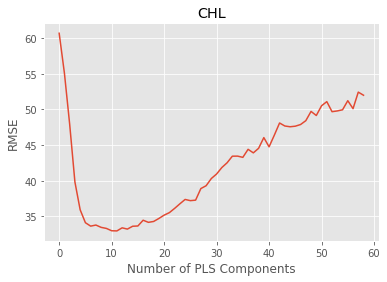

In [107]:
#plot test RMSE vs. number of components
plt.style.use('ggplot')
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('RMSE')
plt.title(trait)

In [108]:
### calculate RMSE
pls = PLSRegression(n_components=n_comb)
pls.fit(X_train, y_train)

PLSRegression(n_components=12)

In [109]:
np.sqrt(mean_squared_error(y_test, pls.predict(X_test)))

29.951130482350766

In [110]:
y_pred = pls.predict(X_test)

Text(150, 550, 'r$^2$ = 0.85')

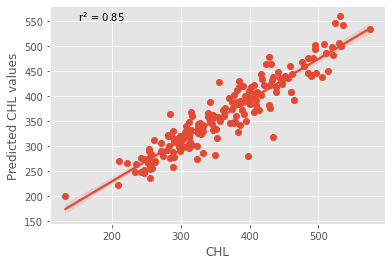

In [111]:
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted' + ' ' + trait + ' ' + 'values')
plt.xlabel('Ground truth LWC measurements')
sns.regplot(x = y_test , y = y_pred)
plt.text(x=150 , y=550 , s='r$^2$ = 0.85'  )

In [112]:
from scipy.stats import pearsonr, spearmanr
y_pred2 = [x[0] for x in y_pred]

r, p = spearmanr(y_test, y_pred2)
r2 = r**2
print(r2, p)

0.8518554688736877 1.5134651654316664e-81


# Predicting of whole dataset

In [124]:
X_test = data.loc[data['CHL'].isnull(), ]

In [125]:
#Identify x 
position_350 = X_test.columns.get_loc('350')
position_2500 = X_test.columns.get_loc('2500') + 1 
X_test = X_test.iloc[:, position_350 : position_2500]

In [126]:
#Extracting the column names
col_names=X_test.columns

In [127]:
#applying savitzky golay
X_test = savgol_filter(X_test, window_length=5 , polyorder = 2)
X_test = pd.DataFrame(X_test, columns=col_names)

In [128]:
#drop first 100 column
X_test = X_test.drop(X_test.columns[0:100], axis=1)

In [129]:
#Create a np array for downsampling for every 5 nm
column_filter = np.arange(0, 2055, 5)

In [130]:
# Choose from the X based on filtering array
X_test = X_test.iloc[: , column_filter]

In [135]:
X_test

,450,455,460,465,470,475,480,485,490,495,...,2460,2465,2470,2475,2480,2485,2490,2495,2500,CHL
0,0.046459,0.046281,0.046662,0.046100,0.046340,0.046150,0.046169,0.046538,0.047070,0.048816,...,0.043528,0.041793,0.040403,0.038937,0.037598,0.036817,0.035544,0.034610,0.033465,287.350948
1,0.052862,0.052976,0.053053,0.052670,0.052708,0.052245,0.052461,0.052448,0.052961,0.054371,...,0.044590,0.043169,0.041853,0.040431,0.039531,0.038499,0.037603,0.037127,0.035841,390.254776
2,0.058149,0.058878,0.059515,0.059599,0.059618,0.059209,0.059467,0.059942,0.061290,0.063893,...,0.051204,0.049626,0.047994,0.046532,0.045018,0.043625,0.042830,0.041864,0.040653,285.125419
3,0.041009,0.041856,0.041903,0.041884,0.041998,0.041957,0.042007,0.042520,0.043038,0.043759,...,0.049640,0.047574,0.046688,0.045081,0.044381,0.043222,0.042006,0.041478,0.040914,405.279513
4,0.035496,0.036285,0.036419,0.036677,0.036848,0.036885,0.036963,0.037299,0.038144,0.039155,...,0.042922,0.041521,0.040042,0.038764,0.037882,0.036749,0.035767,0.035112,0.035336,376.877058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,0.036365,0.037348,0.037411,0.037617,0.037675,0.037895,0.038001,0.038433,0.039158,0.040503,...,0.054179,0.052428,0.051297,0.049566,0.048507,0.047426,0.046460,0.045481,0.044701,496.196548
2157,0.039857,0.040747,0.041158,0.041288,0.041385,0.041611,0.042036,0.042405,0.043337,0.044868,...,0.070532,0.068377,0.066075,0.064168,0.062714,0.061100,0.059776,0.059061,0.058175,512.557188
2158,0.055524,0.056512,0.056707,0.056687,0.056909,0.056799,0.056850,0.057430,0.058237,0.060287,...,0.068099,0.065836,0.063554,0.061879,0.060206,0.058230,0.056884,0.055517,0.054335,544.687494
2159,0.055675,0.056758,0.057085,0.057264,0.056813,0.056744,0.056729,0.057568,0.058704,0.061332,...,0.060951,0.058827,0.056714,0.054842,0.053058,0.051883,0.050530,0.049387,0.048313,496.484387


In [86]:
#X_train = X

In [87]:
#y_train = y

In [132]:
### calculate RMSE
pls = PLSRegression(n_components=n_comb)
pls.fit(X_train, y_train)

PLSRegression(n_components=12)

In [133]:
y_pred = pls.predict(X_test)

In [90]:
y_df = pd.DataFrame(y_pred)

In [91]:
y_df = y_df.rename(columns= {0 : 'CHL'})

In [134]:
X_test['CHL'] = y_pred

In [168]:
data.loc[data['CHL'].isnull(), 'CHL' ] = y_pred

In [137]:
data.to_csv('spectrum_ground_truth_v2_chlpredicted')

In [163]:
raw = pd.read_csv('Raw_spectrum_merged.csv')

In [165]:
raw.drop(raw.filter(regex="Unname"),axis=1, inplace=True)

In [181]:
X_test

,450,455,460,465,470,475,480,485,490,495,...,2460,2465,2470,2475,2480,2485,2490,2495,2500,CHL
0,0.046459,0.046281,0.046662,0.046100,0.046340,0.046150,0.046169,0.046538,0.047070,0.048816,...,0.043528,0.041793,0.040403,0.038937,0.037598,0.036817,0.035544,0.034610,0.033465,287.350948
1,0.052862,0.052976,0.053053,0.052670,0.052708,0.052245,0.052461,0.052448,0.052961,0.054371,...,0.044590,0.043169,0.041853,0.040431,0.039531,0.038499,0.037603,0.037127,0.035841,390.254776
2,0.058149,0.058878,0.059515,0.059599,0.059618,0.059209,0.059467,0.059942,0.061290,0.063893,...,0.051204,0.049626,0.047994,0.046532,0.045018,0.043625,0.042830,0.041864,0.040653,285.125419
3,0.041009,0.041856,0.041903,0.041884,0.041998,0.041957,0.042007,0.042520,0.043038,0.043759,...,0.049640,0.047574,0.046688,0.045081,0.044381,0.043222,0.042006,0.041478,0.040914,405.279513
4,0.035496,0.036285,0.036419,0.036677,0.036848,0.036885,0.036963,0.037299,0.038144,0.039155,...,0.042922,0.041521,0.040042,0.038764,0.037882,0.036749,0.035767,0.035112,0.035336,376.877058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,0.036365,0.037348,0.037411,0.037617,0.037675,0.037895,0.038001,0.038433,0.039158,0.040503,...,0.054179,0.052428,0.051297,0.049566,0.048507,0.047426,0.046460,0.045481,0.044701,496.196548
2157,0.039857,0.040747,0.041158,0.041288,0.041385,0.041611,0.042036,0.042405,0.043337,0.044868,...,0.070532,0.068377,0.066075,0.064168,0.062714,0.061100,0.059776,0.059061,0.058175,512.557188
2158,0.055524,0.056512,0.056707,0.056687,0.056909,0.056799,0.056850,0.057430,0.058237,0.060287,...,0.068099,0.065836,0.063554,0.061879,0.060206,0.058230,0.056884,0.055517,0.054335,544.687494
2159,0.055675,0.056758,0.057085,0.057264,0.056813,0.056744,0.056729,0.057568,0.058704,0.061332,...,0.060951,0.058827,0.056714,0.054842,0.053058,0.051883,0.050530,0.049387,0.048313,496.484387


In [182]:
data

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1001,NaN,NaN,NaN,NaN,287.350948,NaN,NaN,NaN,NaN,...,0.035234,0.035088,0.034933,0.034826,0.034614,0.034352,0.034138,0.033865,0.033638,0.033476
1,1002,NaN,NaN,NaN,NaN,390.254776,NaN,NaN,NaN,NaN,...,0.037554,0.037249,0.037154,0.037163,0.037074,0.037141,0.037005,0.036618,0.036303,0.035844
2,1003,NaN,NaN,NaN,NaN,285.125419,NaN,NaN,NaN,NaN,...,0.042723,0.042242,0.042083,0.041943,0.041776,0.041955,0.041835,0.041389,0.041090,0.040662
3,1004,NaN,NaN,NaN,NaN,405.279513,NaN,NaN,NaN,NaN,...,0.041980,0.041998,0.041733,0.041467,0.041499,0.041415,0.041049,0.041078,0.041080,0.040855
4,1005,7.73,366.0,77.490298,210.344828,376.877058,NaN,NaN,NaN,1.74,...,0.035746,0.035719,0.035662,0.035373,0.035116,0.034928,0.034894,0.035089,0.035207,0.035318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,4596,NaN,NaN,NaN,NaN,512.557188,NaN,NaN,NaN,NaN,...,0.059570,0.059487,0.059379,0.059312,0.059066,0.058804,0.058750,0.058499,0.058298,0.058202
2396,4597,16.62,660.4,73.285199,148.738739,536.600000,458.9,552.0,598.9,4.44,...,0.045764,0.045825,0.045893,0.045686,0.045541,0.045311,0.045272,0.045472,0.045199,0.045085
2397,4598,NaN,NaN,NaN,NaN,544.687494,NaN,NaN,NaN,NaN,...,0.056652,0.056354,0.056035,0.055800,0.055557,0.055148,0.054880,0.054803,0.054617,0.054308
2398,4599,NaN,NaN,NaN,NaN,496.484387,NaN,NaN,NaN,NaN,...,0.050402,0.050328,0.050200,0.049665,0.049339,0.049328,0.049174,0.048901,0.048625,0.048320


In [170]:
data_CHL = data.loc[ : ,  ['PLOT ID', 'CHL']]

In [171]:
data_CHL

,PLOT ID,CHL
0,1001,287.350948
1,1002,390.254776
2,1003,285.125419
3,1004,405.279513
4,1005,376.877058
...,...,...
2395,4596,512.557188
2396,4597,536.600000
2397,4598,544.687494
2398,4599,496.484387


In [172]:
last_merged = pd.merge(data_CHL, raw, how='outer')

In [173]:
last_merged.sort_values('PLOT ID', ascending=True, ignore_index=True, inplace=True)

In [177]:
last_merged

,PLOT ID,CHL,rows,ranges,Block,Rep,Trt,year,genotype,note,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1001,287.350948,1,1,1,1,HN,2022,BGEM-0312-S,BGEM_Tall_late,...,0.035234,0.035088,0.034933,0.034826,0.034614,0.034352,0.034138,0.033865,0.033638,0.033476
1,1002,390.254776,2,1,1,1,HN,2022,BGEM-0245-S,BGEM_Tall_late,...,0.037554,0.037249,0.037154,0.037163,0.037074,0.037141,0.037005,0.036618,0.036303,0.035844
2,1003,285.125419,3,1,1,1,HN,2022,BGEM-0292-S,BGEM_Tall_late,...,0.042723,0.042242,0.042083,0.041943,0.041776,0.041955,0.041835,0.041389,0.041090,0.040662
3,1004,405.279513,4,1,1,1,HN,2022,BGEM-0075-S,BGEM_Tall_late,...,0.041980,0.041998,0.041733,0.041467,0.041499,0.041415,0.041049,0.041078,0.041080,0.040855
4,1005,376.877058,5,1,1,1,HN,2022,BGEM-0204-N,BGEM_Tall_late,...,0.035746,0.035719,0.035662,0.035373,0.035116,0.034928,0.034894,0.035089,0.035207,0.035318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,4596,512.557188,46,12,4,2,HN,2022,B73 X Mo17,Hybrid,...,0.059570,0.059487,0.059379,0.059312,0.059066,0.058804,0.058750,0.058499,0.058298,0.058202
2396,4597,536.600000,47,12,4,2,HN,2022,B73 X Mo17,Hybrid,...,0.045764,0.045825,0.045893,0.045686,0.045541,0.045311,0.045272,0.045472,0.045199,0.045085
2397,4598,544.687494,48,12,4,2,HN,2022,B73 X Mo17,Hybrid,...,0.056652,0.056354,0.056035,0.055800,0.055557,0.055148,0.054880,0.054803,0.054617,0.054308
2398,4599,496.484387,49,12,4,2,HN,2022,B73 X Mo17,Hybrid,...,0.050402,0.050328,0.050200,0.049665,0.049339,0.049328,0.049174,0.048901,0.048625,0.048320


In [175]:
last_merged.to_csv('Raw_spectrum_merged_predicted_CHL')

(array([  2.,   6.,  15., 222., 491., 551., 448., 368., 242.,  33.]),
 array([ 53.14497835, 108.34449273, 163.54400711, 218.7435215 ,
        273.94303588, 329.14255026, 384.34206464, 439.54157903,
        494.74109341, 549.94060779, 605.14012217]),
 <BarContainer object of 10 artists>)

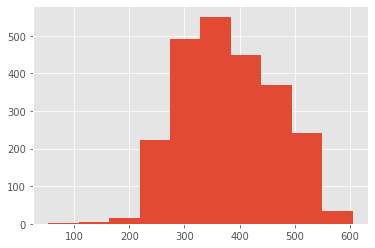

In [180]:
plt.hist(last_merged['CHL'], bins=10)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Raw_spectrum_merged_predicted_CHL')

In [9]:
data.drop(columns='Unnamed: 0', axis=0 , inplace=True)

In [10]:
data.to_csv('Raw_spectrum_merged_predicted_CHL.csv', index=False)

In [11]:
data

,PLOT ID,CHL,rows,ranges,Block,Rep,Trt,year,genotype,note,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1001,287.350948,1,1,1,1,HN,2022,BGEM-0312-S,BGEM_Tall_late,...,0.035234,0.035088,0.034933,0.034826,0.034614,0.034352,0.034138,0.033865,0.033638,0.033476
1,1002,390.254776,2,1,1,1,HN,2022,BGEM-0245-S,BGEM_Tall_late,...,0.037554,0.037249,0.037154,0.037163,0.037074,0.037141,0.037005,0.036618,0.036303,0.035844
2,1003,285.125419,3,1,1,1,HN,2022,BGEM-0292-S,BGEM_Tall_late,...,0.042723,0.042242,0.042083,0.041943,0.041776,0.041955,0.041835,0.041389,0.041090,0.040662
3,1004,405.279513,4,1,1,1,HN,2022,BGEM-0075-S,BGEM_Tall_late,...,0.041980,0.041998,0.041733,0.041467,0.041499,0.041415,0.041049,0.041078,0.041080,0.040855
4,1005,376.877058,5,1,1,1,HN,2022,BGEM-0204-N,BGEM_Tall_late,...,0.035746,0.035719,0.035662,0.035373,0.035116,0.034928,0.034894,0.035089,0.035207,0.035318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,4596,512.557188,46,12,4,2,HN,2022,B73 X Mo17,Hybrid,...,0.059570,0.059487,0.059379,0.059312,0.059066,0.058804,0.058750,0.058499,0.058298,0.058202
2396,4597,536.600000,47,12,4,2,HN,2022,B73 X Mo17,Hybrid,...,0.045764,0.045825,0.045893,0.045686,0.045541,0.045311,0.045272,0.045472,0.045199,0.045085
2397,4598,544.687494,48,12,4,2,HN,2022,B73 X Mo17,Hybrid,...,0.056652,0.056354,0.056035,0.055800,0.055557,0.055148,0.054880,0.054803,0.054617,0.054308
2398,4599,496.484387,49,12,4,2,HN,2022,B73 X Mo17,Hybrid,...,0.050402,0.050328,0.050200,0.049665,0.049339,0.049328,0.049174,0.048901,0.048625,0.048320
